# Trabalho 5 - Redes Neurais
Faça um experimento que plote embeddings de palavras com glove ou word2vec e usando T-SNE.

## Imports
Primeiro é preciso importar as bibliotecas e funções a serem utilizadas.

In [1]:
from gensim.models import word2vec
from gensim.test.utils import common_texts
import numpy as np
import re
import nltk
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sergi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def load_cola_dataset(file_path):
    sentences = []
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip().split('\t')
            sentence = line[3] 
            sentences.append(sentence)
    return sentences

sentences = load_cola_dataset('data/cola_public/raw/in_domain_train.tsv')

In [4]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")

    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)

    sentence = " ".join(sentence)
    return sentence


sentences = sentences[:1000]
pre_processed_sentences = [clean_sentence(sentence) for sentence in sentences]

In [5]:
sentences_arr = [sentence.split() for sentence in pre_processed_sentences]

In [6]:
model = word2vec.Word2Vec(sentences_arr, min_count=5)

In [7]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

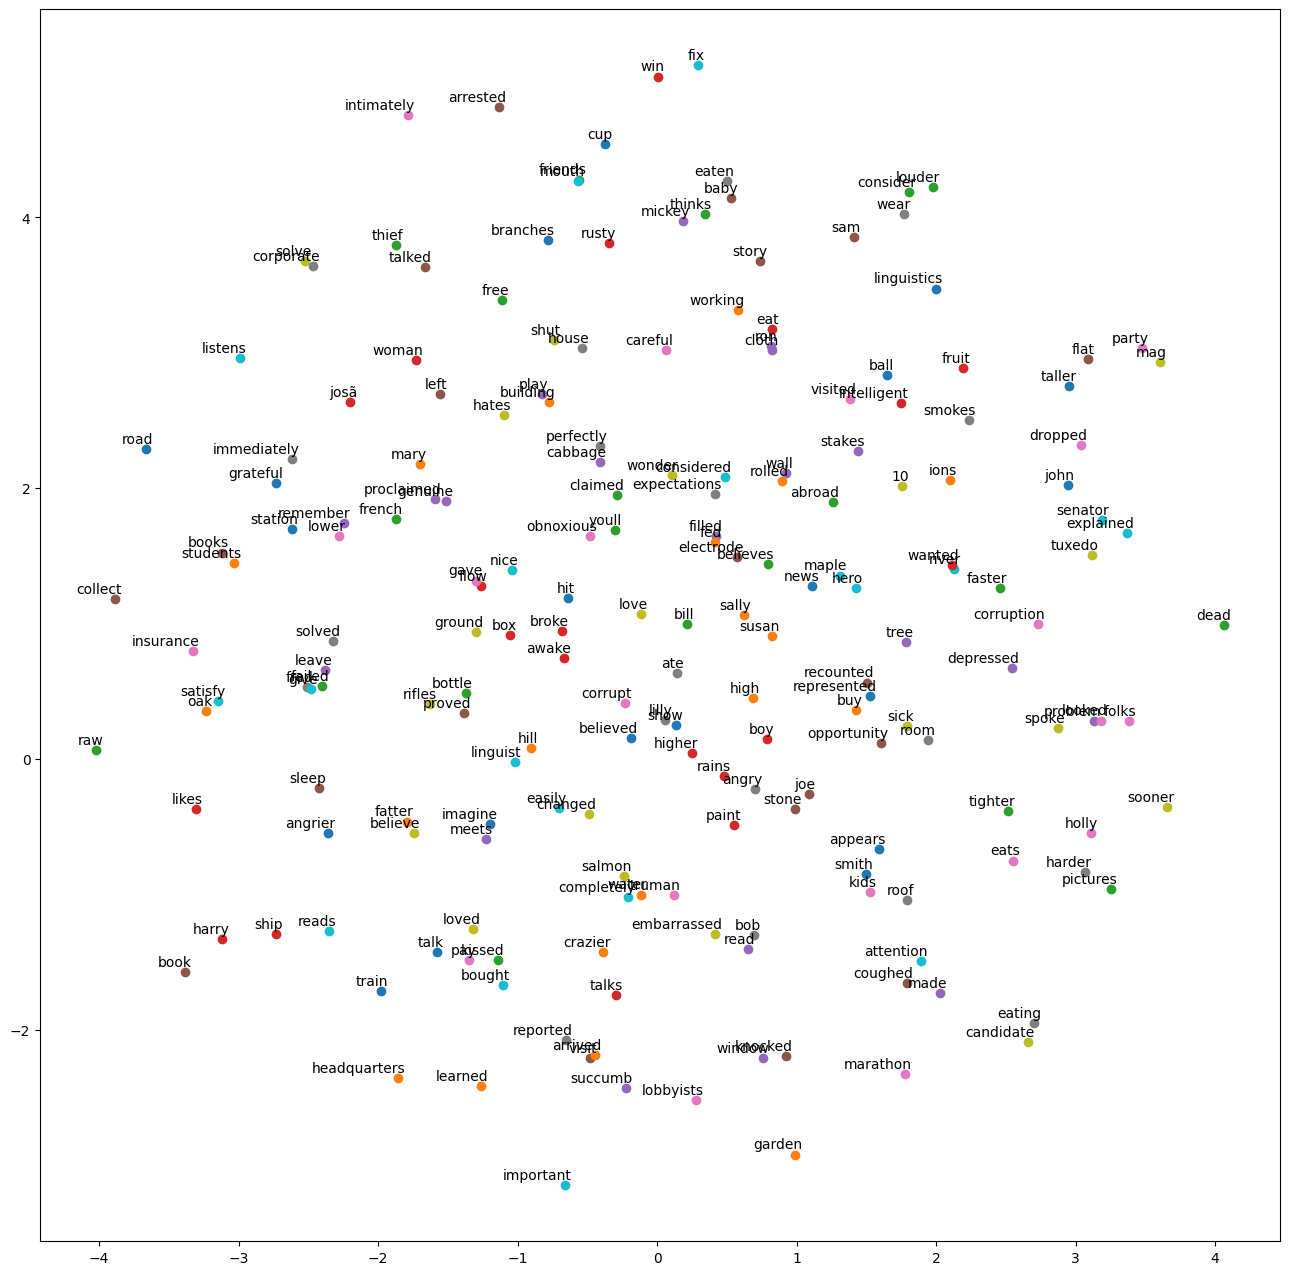

In [8]:
tsne_plot(model)